In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import keras
import keras.backend as kb
import tensorflow as tf
from keras.optimizers import Adam
from sklearn.metrics import r2_score

uploaded = files.upload()

Using TensorFlow backend.


Saving video_data.csv to video_data (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['video_data.csv']))

In [3]:
df.head()

,Likes,Dislikes,Subscribers,Views
0,104460,3365,7300000,1988888
1,103203,3570,3300000,2617005
2,22485,612,1800000,932230
3,23077,1337,465000,1165800
4,12315,522,11000000,551165


In [4]:
df.describe()

,Likes,Dislikes,Subscribers,Views
count,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03
mean,1.298265e+05,1.177348e+04,2.486401e+06,2.110672e+07
std,5.845796e+05,1.857651e+05,5.676479e+06,1.143878e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
25%,5.850000e+02,2.800000e+01,4.600000e+04,3.831525e+04
50%,5.535000e+03,2.205000e+02,3.910000e+05,4.493690e+05
75%,4.092750e+04,2.059000e+03,1.800000e+06,4.022392e+06
max,1.024205e+07,9.653039e+06,7.100000e+07,2.668027e+09


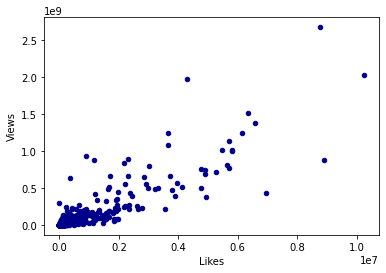

In [5]:
plot1 = df.plot.scatter(x='Likes', y='Views', c='DarkBlue')

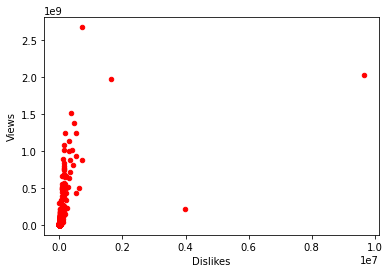

In [6]:
plot2 = df.plot.scatter(x='Dislikes', y='Views', c='Red')

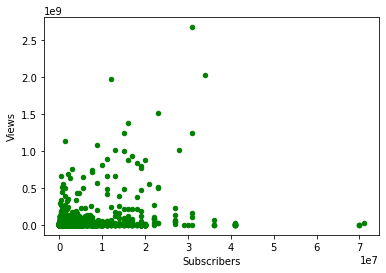

In [7]:
plot3 = df.plot.scatter(x='Subscribers', y='Views', c='Green')

Linear Regression Model

In [8]:
train, test = train_test_split(df,test_size=0.2)

train_X = train[["Likes", "Dislikes", "Subscribers"]].copy()
train_Y = train[["Views"]].copy()
test_X = test[["Likes", "Dislikes", "Subscribers"]].copy()
test_Y = test[["Views"]].copy()

print("Train X: ", train_X.shape)
print("Train Y:", train_Y.shape)
print("Test X:", test_X.shape)
print("Test Y", test_Y.shape)

Train X:  (2691, 3)
Train Y: (2691, 1)
Test X: (673, 3)
Test Y (673, 1)


In [9]:
train_X_scaled = preprocessing.scale(train_X)
test_X_scaled = preprocessing.scale(test_X)

print(train_X_scaled)

[[-0.22213747 -0.10576386 -0.4109492 ]
 [-0.1468069  -0.10149868  1.14861179]
 [-0.19956255 -0.10238001 -0.40691845]
 ...
 [-0.2068723  -0.10107434  0.86310095]
 [-0.22199696 -0.10637317 -0.11099486]
 [-0.19714716 -0.09703765 -0.42656832]]


In [10]:
model_reg = Sequential()
INPUT_DIM_reg = 3
model_reg.add(Dense(1, input_dim=INPUT_DIM_reg, activation='linear'))
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [0]:
OPTIMIZER_reg = keras.optimizers.Adam(lr=10000)
model_reg.compile(loss='mean_squared_error',optimizer=OPTIMIZER_reg)

In [12]:
BatchSize_reg = 32
Epochs_reg = 1000
Verbose_reg = 1
model_reg_history = model_reg.fit(x=train_X_scaled, y=train_Y, batch_size=BatchSize_reg, epochs=Epochs_reg, verbose=Verbose_reg)

Epoch 1/1000
2691/2691 [==============================] - 0s 48us/step - loss: 14634197237592982.0000
Epoch 2/1000
2691/2691 [==============================] - 0s 26us/step - loss: 14471213848806598.0000
Epoch 3/1000
2691/2691 [==============================] - 0s 28us/step - loss: 14310976723115664.0000
Epoch 4/1000
2691/2691 [==============================] - 0s 27us/step - loss: 14150891214425772.0000
Epoch 5/1000
2691/2691 [==============================] - 0s 27us/step - loss: 13994692953121026.0000
Epoch 6/1000
2691/2691 [==============================] - 0s 27us/step - loss: 13835406322344328.0000
Epoch 7/1000
2691/2691 [==============================] - 0s 27us/step - loss: 13683102000084410.0000
Epoch 8/1000
2691/2691 [==============================] - 0s 26us/step - loss: 13529086443911658.0000
Epoch 9/1000
2691/2691 [==============================] - 0s 28us/step - loss: 13383203469947628.0000
Epoch 10/1000
2691/2691 [==============================] - 0s 27us/step - loss: 13

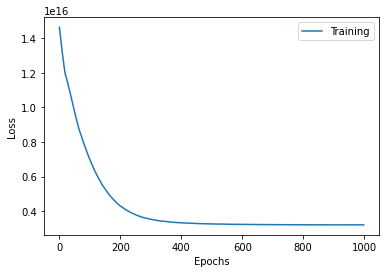

In [13]:
def plot_history(network_history): 
  plt.figure() 
  plt.xlabel('Epochs') 
  plt.ylabel('Loss') 
  plt.plot(network_history.history['loss']) 
  plt.legend(['Training'])
  plt.show()
plot_history(model_reg_history)

In [0]:
predictions_train_reg = model_reg.predict(train_X_scaled)
predictions_test_reg = model_reg.predict(test_X_scaled)

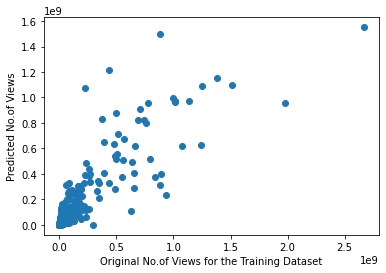

In [15]:
plt.scatter(train_Y, predictions_train_reg)
plt.xlabel('Original No.of Views for the Training Dataset')
plt.ylabel('Predicted No.of Views')
plt.show()

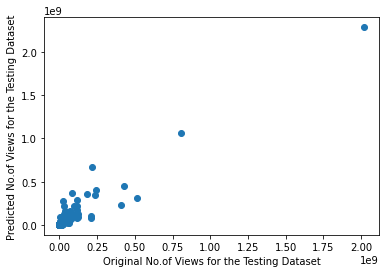

In [16]:
plt.scatter(test_Y, predictions_test_reg)
plt.xlabel('Original No.of Views for the Testing Dataset')
plt.ylabel('Predicted No.of Views for the Testing Dataset')
plt.show()

In [17]:
# More the R^2 value is closer to 1, more accurate the model is

print("R^2 values for the training dataset", r2_score(train_Y, predictions_train_reg))
print("R^2 values for the testing dataset", r2_score(test_Y, predictions_test_reg))

R^2 values for the training dataset 0.7739141848074544
R^2 values for the testing dataset 0.8467635051149744


Neural Network Model

In [18]:
model_dnn = keras.Sequential([
    keras.layers.Dense(13, activation=tf.nn.relu, input_shape=(train_X_scaled.shape[1],)),
    keras.layers.Dense(13, activation=tf.nn.relu),
    keras.layers.Dense(13, activation=tf.nn.relu),
    keras.layers.Dense(13, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])
model_dnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                52        
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 14        
Total params: 612
Trainable params: 612
Non-trainable params: 0
_________________________________________________________________


In [0]:
OPTIMIZER_dnn = keras.optimizers.Adam(lr=0.003)
model_dnn.compile(loss='mean_squared_error',optimizer=OPTIMIZER_dnn)

In [20]:
BatchSize_dnn = 32
Epochs_dnn = 1000
Verbose_dnn = 1
model_dnn_history = model_dnn.fit(x=train_X_scaled, y=train_Y, batch_size=BatchSize_dnn, epochs=Epochs_dnn, verbose=Verbose_dnn)

Epoch 1/1000
2691/2691 [==============================] - 0s 75us/step - loss: 14724429448576854.0000
Epoch 2/1000
2691/2691 [==============================] - 0s 35us/step - loss: 14724397541896080.0000
Epoch 3/1000
2691/2691 [==============================] - 0s 34us/step - loss: 14723914497097090.0000
Epoch 4/1000
2691/2691 [==============================] - 0s 34us/step - loss: 14720279640832746.0000
Epoch 5/1000
2691/2691 [==============================] - 0s 35us/step - loss: 14706065455157054.0000
Epoch 6/1000
2691/2691 [==============================] - 0s 34us/step - loss: 14669462463718000.0000
Epoch 7/1000
2691/2691 [==============================] - 0s 34us/step - loss: 14586336804144004.0000
Epoch 8/1000
2691/2691 [==============================] - 0s 34us/step - loss: 14447128159935390.0000
Epoch 9/1000
2691/2691 [==============================] - 0s 35us/step - loss: 14222569479856624.0000
Epoch 10/1000
2691/2691 [==============================] - 0s 35us/step - loss: 13

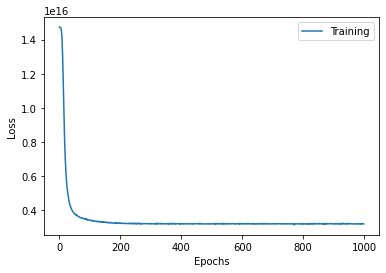

In [21]:
def plot_history(network_history): 
  plt.figure() 
  plt.xlabel('Epochs') 
  plt.ylabel('Loss') 
  plt.plot(network_history.history['loss']) 
  plt.legend(['Training'])
  plt.show()
plot_history(model_dnn_history)

In [0]:
predictions_train_dnn = model_dnn.predict(train_X_scaled)
predictions_test_dnn = model_dnn.predict(test_X_scaled)

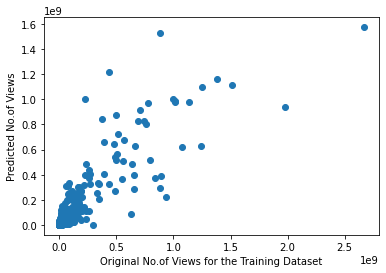

In [23]:
plt.scatter(train_Y, predictions_train_dnn)
plt.xlabel('Original No.of Views for the Training Dataset')
plt.ylabel('Predicted No.of Views')
plt.show()

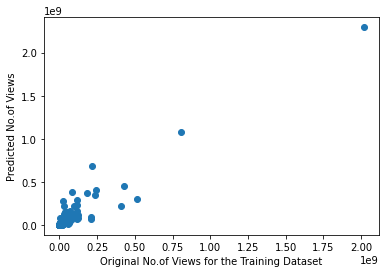

In [24]:
plt.scatter(test_Y, predictions_test_dnn)
plt.xlabel('Original No.of Views for the Training Dataset')
plt.ylabel('Predicted No.of Views')
plt.show()

In [25]:
# More the R^2 value is closer to 1, more accurate the model is

print("R2 values for the training dataset", r2_score(train_Y, predictions_train_dnn))
print("R2 values for the testing dataset", r2_score(test_Y, predictions_test_dnn))

R2 values for the training dataset 0.7749304631949688
R2 values for the testing dataset 0.8429577200311797
